In [1]:
import pandas as pd

# Load the Sainsbury's dataset
sains_data = pd.read_csv('datasets/All_Data_Sains.csv')

# Display the first few rows of the dataset
sains_data.head()

,supermarket,prices_(¬£),prices_unit_(¬£),unit,names,date,category,own_brand
0,Sains,15.00,4.41,kg,Gourmet Perle Chef's Collection Mini Fillets i...,20240211,pets,False
1,Sains,1.15,19.17,kg,Dreamies Pride Cat Treat Biscuits with Salmon 60g,20240211,pets,False
2,Sains,1.15,9.20,kg,Pedigree Tasty Minis Puppy Dog Treats Chicken ...,20240211,pets,False
3,Sains,1.10,3.60,l,Felight Cat Litter Freshener 300ml,20240211,pets,False
4,Sains,0.85,2.13,kg,Sainsbury's Complete Nutrition 1+ Adult Cat Fo...,20240211,pets,True


In [2]:
# Check for missing values
missing_values = sains_data.isnull().sum()

# Summarize the data
summary_statistics = sains_data.describe(include='all')

# Check data types
data_types = sains_data.dtypes

# Check unique values for 'category'
unique_categories = sains_data['category'].unique()

# Output the results
print("Missing Values:\n", missing_values)
print("\nSummary Statistics:\n", summary_statistics)
print("\nData Types:\n", data_types)
print("\nUnique Categories:\n", unique_categories)

Missing Values:
 supermarket          0
prices_(¬£)          0
prices_unit_(¬£)    95
unit                95
names                0
date                 0
category             0
own_brand            0
dtype: int64

Summary Statistics:
        supermarket    prices_(¬£)  prices_unit_(¬£)    unit  \
count       905350  905350.000000     905255.000000  905255   
unique           1            NaN               NaN       4   
top          Sains            NaN               NaN      kg   
freq        905350            NaN               NaN  411396   
mean           NaN       5.411964         49.216193     NaN   
std            NaN       7.160730        620.244202     NaN   
min            NaN       0.010000          0.000000     NaN   
25%            NaN       1.850000          3.900000     NaN   
50%            NaN       3.000000          8.000000     NaN   
75%            NaN       6.250000         15.300000     NaN   
max            NaN     190.000000      40000.000000     NaN   

       

In [3]:
# Convert the 'date' column to datetime format
sains_data['date'] = pd.to_datetime(sains_data['date'], format='%Y%m%d')

# Check the conversion
print(sains_data['date'].head())


0   2024-02-11
1   2024-02-11
2   2024-02-11
3   2024-02-11
4   2024-02-11
Name: date, dtype: datetime64[ns]


In [4]:
# Renaming the columns
sains_data.rename(columns={'prices_(¬£)': 'prices_pounds', 'prices_unit_(¬£)': 'per_unit_price'}, inplace=True)

### Null Values

In [5]:
sains_data.isnull().sum()

supermarket        0
prices_pounds      0
per_unit_price    95
unit              95
names              0
date               0
category           0
own_brand          0
dtype: int64

In [6]:
# Checking which rows are null
sains_null = sains_data[sains_data.isnull().any(axis=1)]
print(sains_null)

       supermarket  prices_pounds  per_unit_price unit  \
18018        Sains            1.2             NaN  NaN   
25397        Sains            4.5             NaN  NaN   
47499        Sains            1.2             NaN  NaN   
54877        Sains            4.5             NaN  NaN   
76531        Sains            1.2             NaN  NaN   
...            ...            ...             ...  ...   
862274       Sains            4.5             NaN  NaN   
870318       Sains            4.5             NaN  NaN   
886626       Sains            1.2             NaN  NaN   
889430       Sains            4.5             NaN  NaN   
896763       Sains            4.5             NaN  NaN   

                                                    names       date  \
18018                 Sainsbury's Hot Cross Bun Loaf 400g 2024-02-11   
25397   Sainsbury's Hot Smoked Salmon & Baby Potato Sa... 2024-02-11   
47499                 Sainsbury's Hot Cross Bun Loaf 400g 2024-02-10   
54877   Sainsbu

In [7]:
rows_starting_with_sainsbury = sains_data[sains_data['names'].str.startswith('Sainsbury\'s Hot Cross Bun Loaf 400g')]
#print(rows_starting_with_sainsbury)

### Imputing null values

In [8]:
product_1_name = "Sainsbury's Hot Cross Bun Loaf 400g"
per_unit_price = 1.2
unit = "kg"

# Imputing null values for the specific product
sains_data.loc[sains_data['names'] == product_1_name, 'unit'] = sains_data.loc[sains_data['names'] == product_1_name, 'unit'].fillna(unit)
sains_data.loc[sains_data['names'] == product_1_name, 'per_unit_price'] = sains_data.loc[sains_data['names'] == product_1_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(sains_data[sains_data['names'] == product_1_name])

In [9]:
rows_starting_with_pasta = sains_data[sains_data['names'].str.startswith('Sainsbury\'s Spicy Chicken & Puttanesca Pasta')]
#print(rows_starting_with_pasta)

product_2_name = "Sainsbury's Spicy Chicken & Puttanesca Pasta Salad, Taste the Difference"
per_unit_price = 14.2
unit = "kg"

# Imputing null values for the specific product
sains_data.loc[sains_data['names'] == product_2_name, 'unit'] = sains_data.loc[sains_data['names'] == product_2_name, 'unit'].fillna(unit)
sains_data.loc[sains_data['names'] == product_2_name, 'per_unit_price'] = sains_data.loc[sains_data['names'] == product_2_name, 'per_unit_price'].fillna(per_unit_price)

# Verifing changes
#print(sains_data[sains_data['names'] == product_2_name])

In [10]:
# Dropping the remaining null values
sains_data.dropna(inplace = True)
print("\nChecking for null values:\n{}".format(sains_data.isnull().sum()))


Checking for null values:
supermarket       0
prices_pounds     0
per_unit_price    0
unit              0
names             0
date              0
category          0
own_brand         0
dtype: int64


### Visualizations

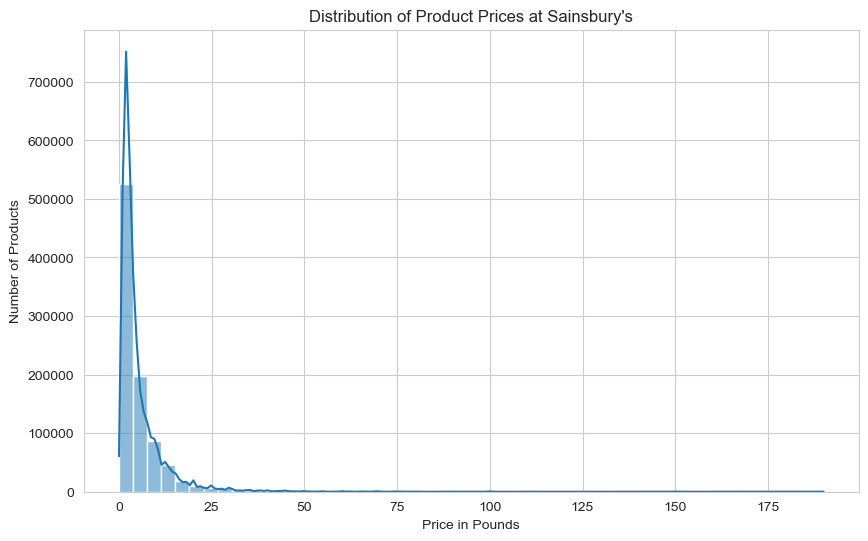

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Analyze the price distribution of products
plt.figure(figsize=(10, 6))
sns.histplot(sains_data['prices_pounds'], bins=50, kde=True)
plt.title('Distribution of Product Prices at Sainsbury\'s')
plt.xlabel('Price in Pounds')
plt.ylabel('Number of Products')
plt.show()

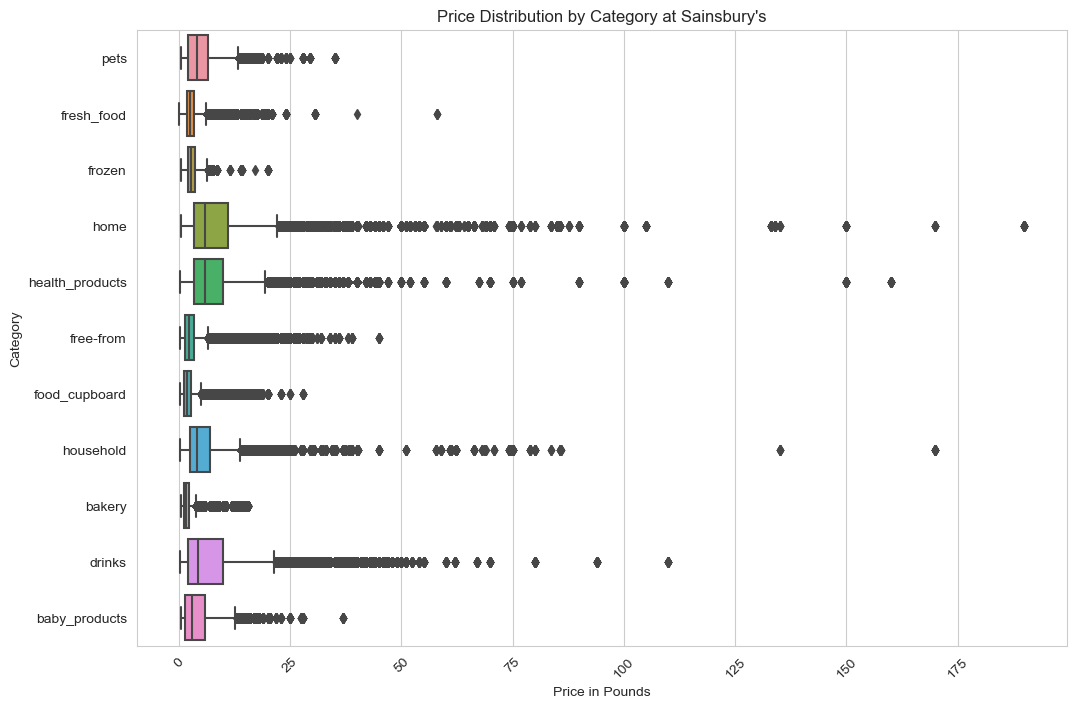

In [12]:
# Analyze the price distribution by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='prices_pounds', y='category', data=sains_data)
plt.title('Price Distribution by Category at Sainsbury\'s')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

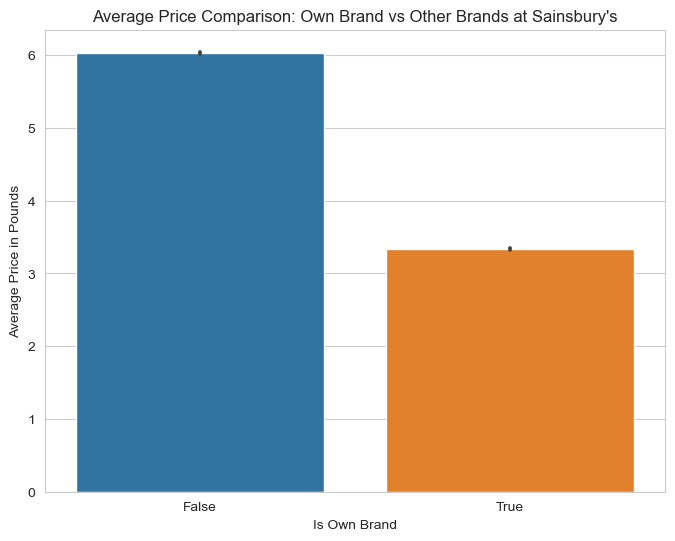

In [13]:
# Compare the average price between own-brand and other brands
plt.figure(figsize=(8, 6))
sns.barplot(x='own_brand', y='prices_pounds', data=sains_data, estimator=lambda x: sum(x) / len(x))
plt.title('Average Price Comparison: Own Brand vs Other Brands at Sainsbury\'s')
plt.xlabel('Is Own Brand')
plt.ylabel('Average Price in Pounds')
plt.show()

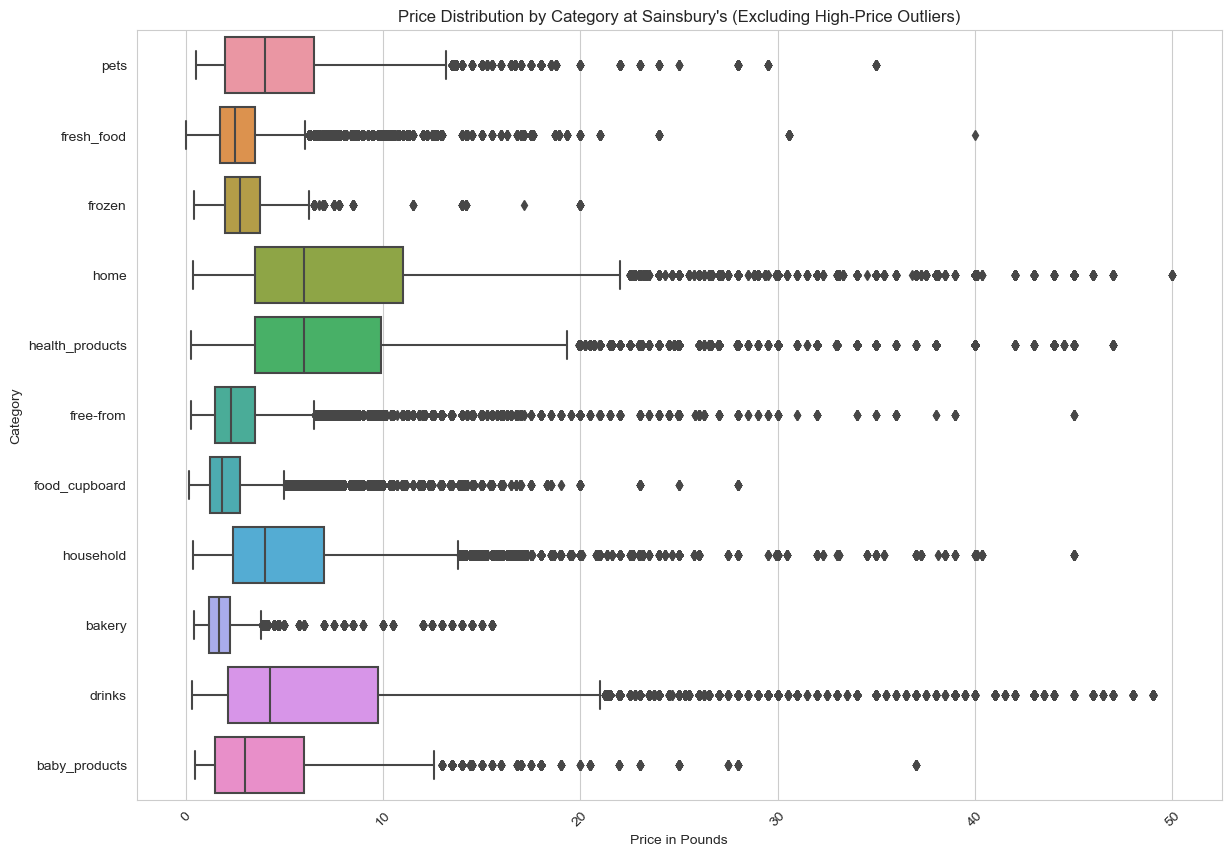

In [14]:
# Category-specific price distribution
plt.figure(figsize=(14, 10))
sns.boxplot(x='prices_pounds', y='category', data=sains_data[sains_data['prices_pounds'] < 50])  # Limiting to remove outliers for visualization clarity
plt.title('Price Distribution by Category at Sainsbury\'s (Excluding High-Price Outliers)')
plt.xlabel('Price in Pounds')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()


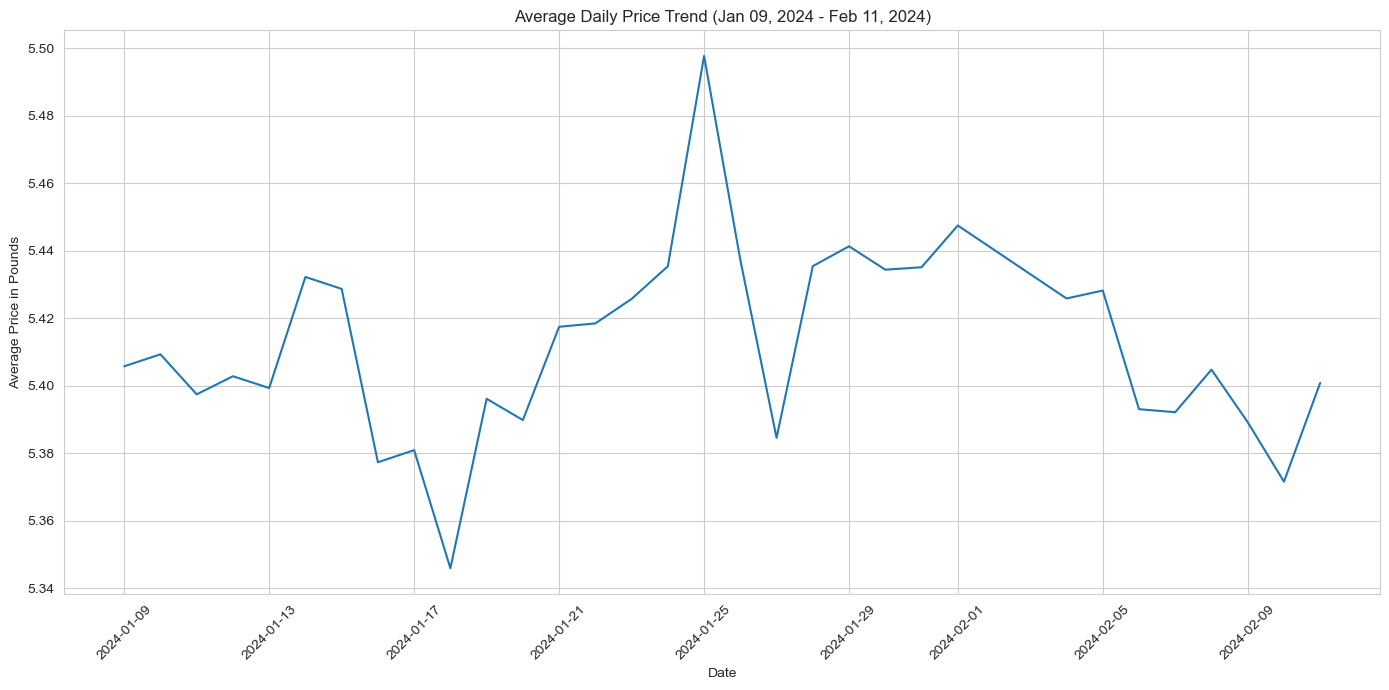

In [15]:
# Price Trends Over Time
# Adjusting for daily price trends
sains_data['date'] = pd.to_datetime(sains_data['date'])  # Ensure 'date' is in datetime format
daily_price_trends = sains_data.groupby(sains_data['date'])['prices_pounds'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_price_trends, x='date', y='prices_pounds')
plt.title('Average Daily Price Trend (Jan 09, 2024 - Feb 11, 2024)')
plt.xlabel('Date')
plt.ylabel('Average Price in Pounds')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot parameters to give some padding and prevent overlap
plt.show()

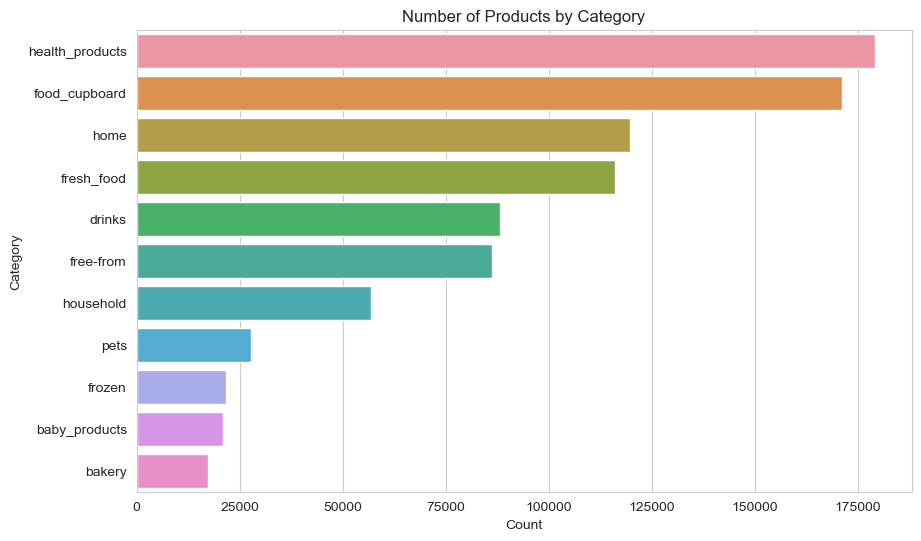

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart showing the number of products per category
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=sains_data, order=sains_data['category'].value_counts().index)
plt.title('Number of Products by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

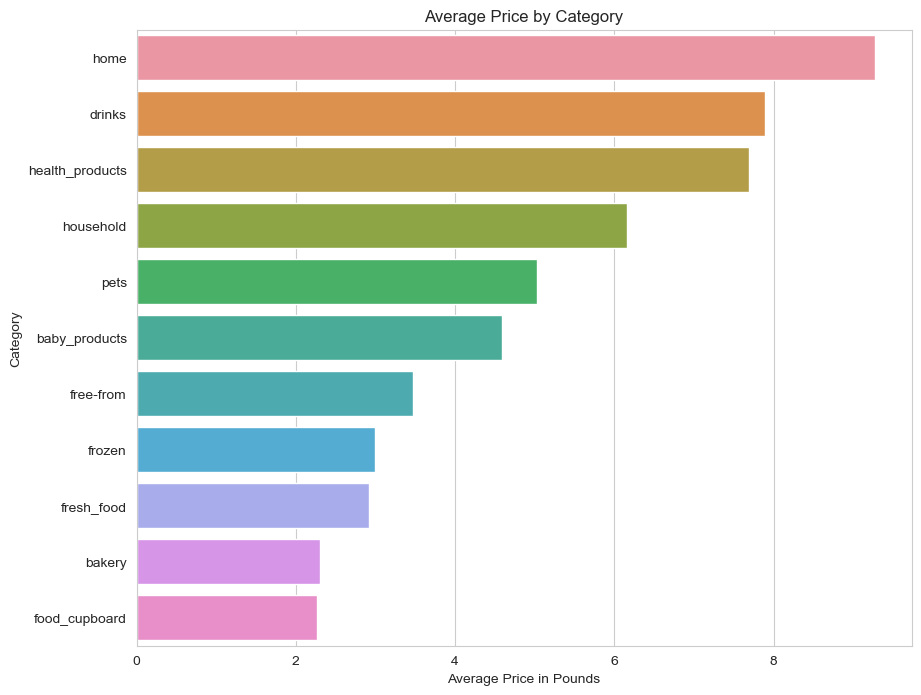

In [17]:
# Calculate the average price per category
average_price_per_category = sains_data.groupby('category')['prices_pounds'].mean().reset_index().sort_values(by='prices_pounds', ascending=False)

# Bar chart showing the average price per category
plt.figure(figsize=(10, 8))
sns.barplot(x='prices_pounds', y='category', data=average_price_per_category)
plt.title('Average Price by Category')
plt.xlabel('Average Price in Pounds')
plt.ylabel('Category')
plt.show()

In [19]:
import pandas as pd

# Load the dataset
sains_data = pd.read_csv('datasets/All_Data_Sains.csv', low_memory=False)

# Ensure that 'names' column is of type string
sains_data['names'] = sains_data['names'].astype(str)

# Group the data by 'category' and collect unique product names
category_products = sains_data.groupby('category')['names'].apply(lambda x: x.unique()).reset_index()

# Create a dictionary where each key is a category and value is a list of products
category_dict = {row['category']: list(row['names']) for index, row in category_products.iterrows()}

# Find the longest list of products to determine the number of rows needed
max_length = max(len(products) for products in category_dict.values())

# Create a new dictionary where each category has the same number of items (filling with None if needed)
equal_length_dict = {category: (products + [None]*(max_length - len(products))) for category, products in category_dict.items()}

# Convert dictionary to DataFrame
category_dfsb = pd.DataFrame(equal_length_dict)

# Save this to a CSV file for better readability in Excel or other programs
category_dfsb.to_csv('datasets/category_productsSB.csv', index=False)